In [ ]:
# Block 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Block 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D


In [ ]:
# Block 3: Define the path to your dataset
import os
import zipfile

# Path to the zip file in Google Drive
zip_path = '/content/drive/MyDrive/archive (1).zip'

# Extract the zip file
extracted_path = '/content/traffic-sign-dataset'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List the contents of the extracted directory to verify the structure
extracted_contents = os.listdir(extracted_path)
print(f"Contents of the extracted directory: {extracted_contents}")

# List the contents of the traffic_Data directory to verify its structure
data_path = os.path.join(extracted_path, 'traffic_Data')
data_contents = os.listdir(data_path)
print(f"Contents of the traffic_Data directory: {data_contents}")



Contents of the extracted directory: ['traffic_Data', 'labels.csv']
Contents of the traffic_Data directory: ['DATA', 'TEST']


In [ ]:
# Block 4: Load and preprocess the dataset
data = []
labels = []
classes = 43  # Adjust this to the correct number of classes if different

# Path to the DATA folder within traffic_Data
data_subdir = os.path.join(data_path, 'DATA')

# Adjust this part to fit your dataset's structure
for i in range(classes):
    path = os.path.join(data_subdir, str(i))
    if not os.path.exists(path):
        print(f"Directory {path} does not exist, skipping.")
        continue

    images = os.listdir(path)
    for img_name in images:
        try:
            img_path = os.path.join(path, img_name)
            image = Image.open(img_path)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

data = np.array(data)
labels = np.array(labels)


In [ ]:
# Block 5: Train-test split
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)


In [ ]:
# Block 6: Build the model
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(30, 30, 3)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))


In [ ]:
# Block 7: Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Block 8: Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test), verbose=1)


Epoch 1/15
82/82 [==============================] - 13s 141ms/step - loss: 4.0412 - accuracy: 0.1697 - val_loss: 2.3828 - val_accuracy: 0.3769
Epoch 2/15
82/82 [==============================] - 11s 136ms/step - loss: 2.2051 - accuracy: 0.4057 - val_loss: 1.3769 - val_accuracy: 0.6600
Epoch 3/15
82/82 [==============================] - 12s 142ms/step - loss: 1.4627 - accuracy: 0.6186 - val_loss: 0.7840 - val_accuracy: 0.8400
Epoch 4/15
82/82 [==============================] - 11s 138ms/step - loss: 0.9971 - accuracy: 0.7306 - val_loss: 0.5286 - val_accuracy: 0.8538
Epoch 5/15
82/82 [==============================] - 9s 110ms/step - loss: 0.7464 - accuracy: 0.7895 - val_loss: 0.4190 - val_accuracy: 0.8923
Epoch 6/15
82/82 [==============================] - 12s 143ms/step - loss: 0.6216 - accuracy: 0.8214 - val_loss: 0.3071 - val_accuracy: 0.9277
Epoch 7/15
82/82 [==============================] - 13s 161ms/step - loss: 0.5315 - accuracy: 0.8395 - val_loss: 0.3194 - val_accuracy: 0.9092


In [ ]:
# Block 9: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc}")


21/21 [==============================] - 1s 58ms/step - loss: 0.1305 - accuracy: 0.9692
Test accuracy: 0.9692307710647583


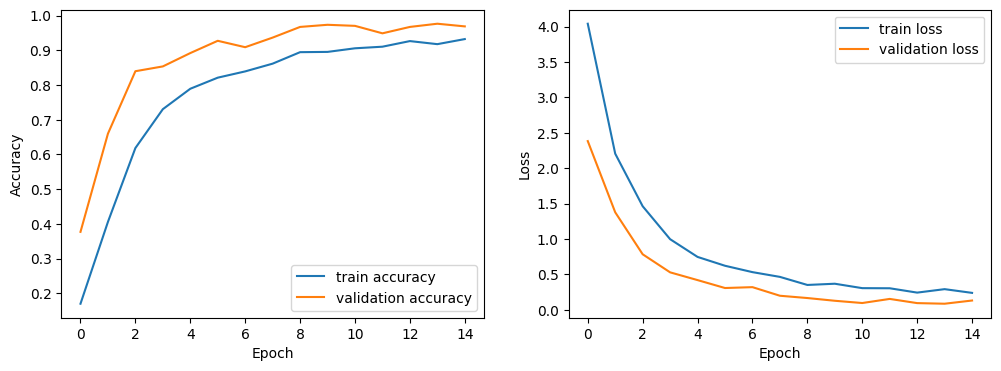

In [ ]:
# Block 10: Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


21/21 [==============================] - 1s 26ms/step


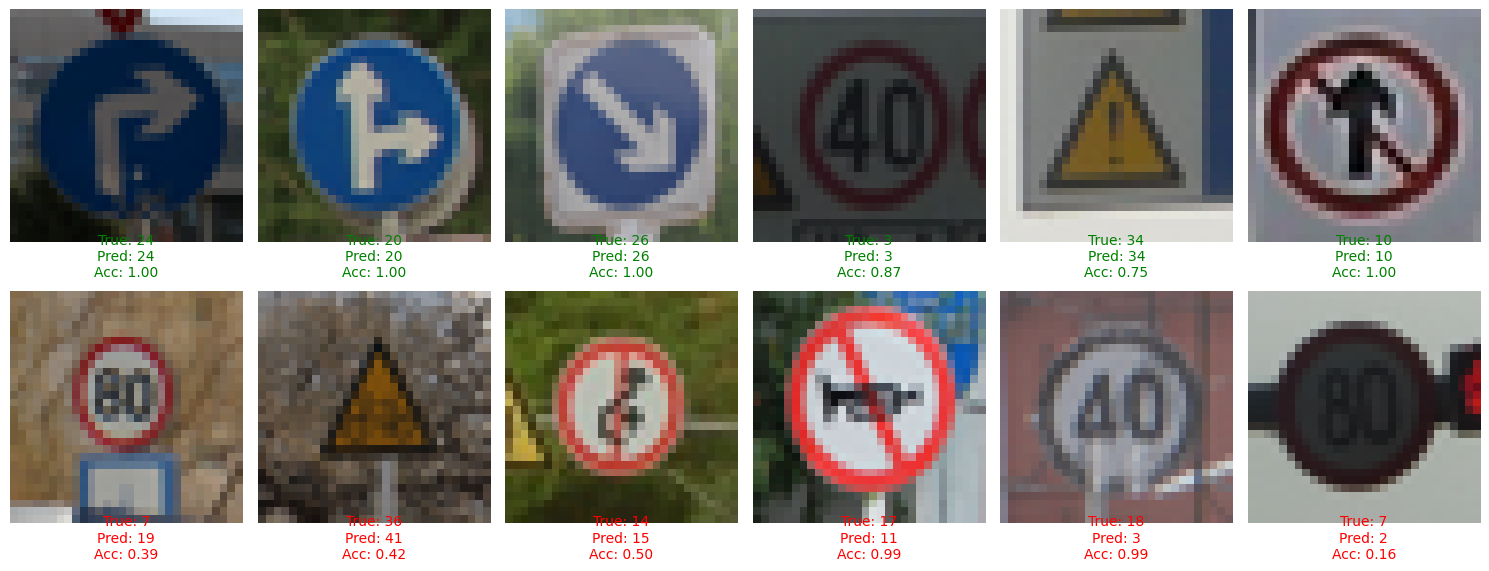

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Block 11: Visualize correct and incorrect predictions

# Get model predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Lists to hold correct and incorrect predictions
correct_indices = []
incorrect_indices = []

for i in range(len(true_classes)):
    if true_classes[i] == predicted_classes[i] and len(correct_indices) < 6:
        correct_indices.append(i)
    elif true_classes[i] != predicted_classes[i] and len(incorrect_indices) < 6:
        incorrect_indices.append(i)
    if len(correct_indices) == 6 and len(incorrect_indices) == 6:
        break

# Create subplots
fig, axs = plt.subplots(2, 6, figsize=(15, 6))

# Plot correct predictions
for i, idx in enumerate(correct_indices):
    image = X_test[idx]
    true_label = true_classes[idx]
    predicted_label = predicted_classes[idx]
    accuracy = predictions[idx][predicted_label]

    axs[0, i].imshow(image)
    axs[0, i].axis('off')
    label_text = f"True: {true_label}\nPred: {predicted_label}\nAcc: {accuracy:.2f}"
    axs[0, i].text(0.5, -0.15, label_text, color='green', transform=axs[0, i].transAxes, ha='center')

# Plot incorrect predictions
for i, idx in enumerate(incorrect_indices):
    image = X_test[idx]
    true_label = true_classes[idx]
    predicted_label = predicted_classes[idx]
    accuracy = predictions[idx][predicted_label]

    axs[1, i].imshow(image)
    axs[1, i].axis('off')
    label_text = f"True: {true_label}\nPred: {predicted_label}\nAcc: {accuracy:.2f}"
    axs[1, i].text(0.5, -0.15, label_text, color='red', transform=axs[1, i].transAxes, ha='center')

plt.tight_layout()
plt.show()

